In [1]:

# one of the package managers pip or conda has f*cked up my PATH
import sys
sys.path.append("/home/macbuse/miniconda3/lib/python3.11/site-packages")

import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import scipy.stats as stats
import math


/tmp/ipykernel_10945/4059487553.py:7: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.5)
  import scipy.stats as stats


I changed most of the figure code to use
```fig, ax = plt.subplots()```
this is to avoid overwriting module functions accidentally like
```plt.title = "fubar"```

There are comments where I modified variable names for consistency reasons
eg ```x -> Xs```

# Exo 1

In [83]:

exemple1 = npr.random(10)
exemple2 = npr.choice(exemple1, size=(2,3), replace=False)
exemple3 = npr.choice([0,3,4],10,p=[1/4,1/4,1/2])

# don't undersstand these are never referenced again

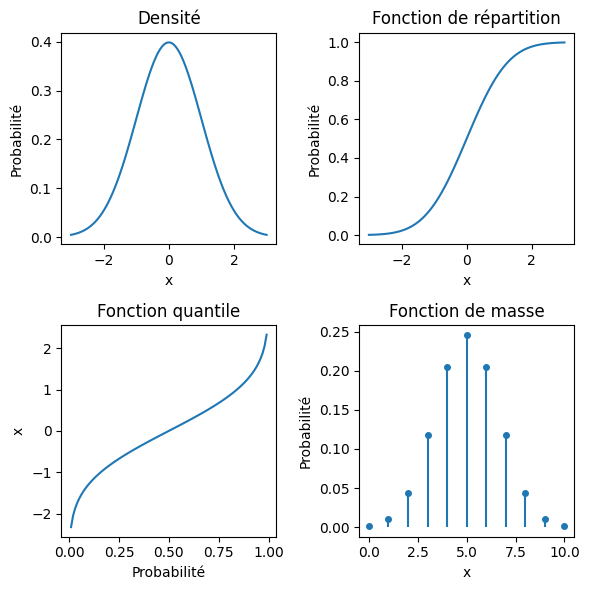

In [74]:
n, p = 10, 0.5
x_cont = np.linspace(-3, 3, 100)
prob_range = np.linspace(0.01, 0.99, 100)
x_disc = np.arange(n + 1)


fig, axes = plt.subplots(2, 2, figsize=(6, 6))

# 1. Densité
ax = axes[0, 0]
ax.plot(x_cont, stats.norm.pdf(x_cont))
ax.set_title("Densité")
ax.set_xlabel("x")
ax.set_ylabel("Probabilité")

# 2. Fonction de répartition
ax = axes[0, 1]
ax.plot(x_cont, stats.norm.cdf(x_cont))
ax.set_title("Fonction de répartition")
ax.set_xlabel("x")
ax.set_ylabel("Probabilité")

# 3. Fonction quantile
ax = axes[1, 0]
ax.plot(prob_range, stats.norm.ppf(prob_range))
ax.set_title("Fonction quantile")
ax.set_xlabel("Probabilité")
ax.set_ylabel("x")

# 4. Fonction de masse
ax = axes[1, 1]
ax.vlines(x_disc, 0, stats.binom.pmf(x_disc, n, p))
ax.plot(x_disc, stats.binom.pmf(x_disc, n, p), 'o', markersize=4)
ax.set_title("Fonction de masse")
ax.set_xlabel("x")
ax.set_ylabel("Probabilité")

plt.tight_layout()


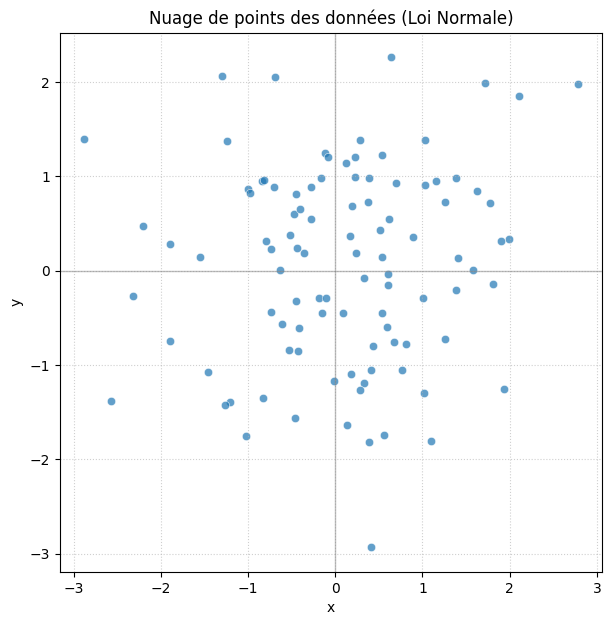

In [75]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

# --- Génération des données ---
# On utilise la loi normale centrée réduite pour 100 points en 2D
XY = npr.normal(size=(2, 100))

# --- Création de la figure et de l'axe ---
fig, ax = plt.subplots(figsize=(7, 7))

# Tracé du nuage de points
# 'alpha' gère la transparence, 'edgecolor' définit le contour des points
ax.scatter(XY[0, :], XY[1, :], 
           alpha=0.7, edgecolor='w', linewidth=0.5)

# --- Configuration sécurisée ---
ax.set_title("Nuage de points des données (Loi Normale)")
ax.set_xlabel("x")
ax.set_ylabel("y")

# Optionnel : Ajout de lignes pour les axes 0,0 pour mieux voir la symétrie
ax.axhline(0, color='grey', lw=1, alpha=0.5)
ax.axvline(0, color='grey', lw=1, alpha=0.5)

# Ajout d'une grille légère
ax.grid(True, linestyle=':', alpha=0.6)

plt.show()

# Exo 2

Le **lemme de Borel–Cantelli** est un résultat fondamental de la théorie des probabilités. Il en existe deux parties.

---

### Lemme de Borel–Cantelli (première partie)

Soit $(A_n)_{n \ge 1}$ une suite d’événements définis sur un même espace probabilisé $(\Omega, \mathcal{F}, \mathbb{P})$.

Si
$$
\sum_{n=1}^{\infty} \mathbb{P}(A_n) < \infty,
$$
alors
$$
\mathbb{P}\big(A_n \ \text{se produit une infinité de fois}\big) = 0.
$$

Autrement dit, **presque sûrement, seuls un nombre fini des événements (A_n) se réalisent**.

---

### Lemme de Borel–Cantelli (seconde partie)

Si les événements $(A_n)*{n \ge 1}$ sont **indépendants** et si
$$
\sum_{n=1}^{\infty} \mathbb{P}(A_n) = \infty,
$$
alors
$$
\mathbb{P}\big(A_n \ \text{se produit une infinité de fois}\big) = 1.
$$

Autrement dit, **presque sûrement, une infinité des événements (A_n) se réalisent**.

---

### Remarque importante

Sans l’hypothèse d’indépendance, la seconde partie est en général fausse.

---

### Intuition

* Si la somme des probabilités est finie, les événements sont « trop rares » pour se produire infiniment souvent.
* Si la somme est infinie et que les événements sont indépendants, ils se produisent suffisamment souvent pour apparaître une infinité de fois presque sûrement.



---

# Exo 2

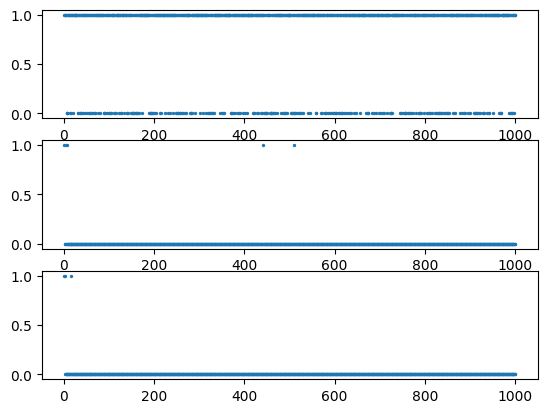

In [107]:

n=1000

p=3/4

# I added s=2 o change the size of the markers

X1 = (npr.uniform(size=n)<=p) +0
plt.figure()
plt.subplot(3,1,1)
plt.scatter(np.arange(1,n+1),X1,s=2)

p = 1/np.arange(1,n+1)
X2 = (npr.uniform(size=n)<=p) +0
plt.subplot(3,1,2)
plt.scatter(np.arange(1,n+1),X2,s=2)

p = 1/np.arange(1,n+1)**2
X3 = (npr.uniform(size=n)<=p) +0
plt.subplot(3,1,3)
plt.scatter(np.arange(1,n+1),X3,s=2)
plt.show()

### Ce qu'il faut observer (Analyse pédagogique)

Cet exercice illustre les deux parties du **Lemme de Borel-Cantelli**. 
L'observation clé porte sur la fréquence et la persistance des "succès" (les points à ) lorsque .

#### 1. Cas  (Somme divergente : )

* **Observation :** Les points sont omniprésents et uniformément répartis sur tout le graphique.
* **Interprétation :** La probabilité de succès est constante. L'événement "succès" se produit une infinité de fois avec une probabilité de 1.

#### 2. Cas  (Série harmonique : )

* **Observation :** On remarque une raréfaction progressive des points à  à mesure que  augmente, mais **ils ne s'arrêtent jamais**. Même vers , on trouve encore des succès isolés.
* **Interprétation :** Bien que la probabilité tende vers 0, la série  diverge. Selon le deuxième lemme de Borel-Cantelli (puisque les  sont indépendants), l'événement  se produit encore **presque sûrement une infinité de fois** ().

#### 3. Cas  (Série convergente : )

* **Observation :** On voit quelques succès au tout début (pour les petites valeurs de ), puis très rapidement, le graphique devient une ligne plate à . Passé un certain rang, il n'y a plus aucun point à .
* **Interprétation :** La série  converge. Selon le premier lemme de Borel-Cantelli, l'événement  ne se produit qu'un **nombre fini de fois** presque sûrement.



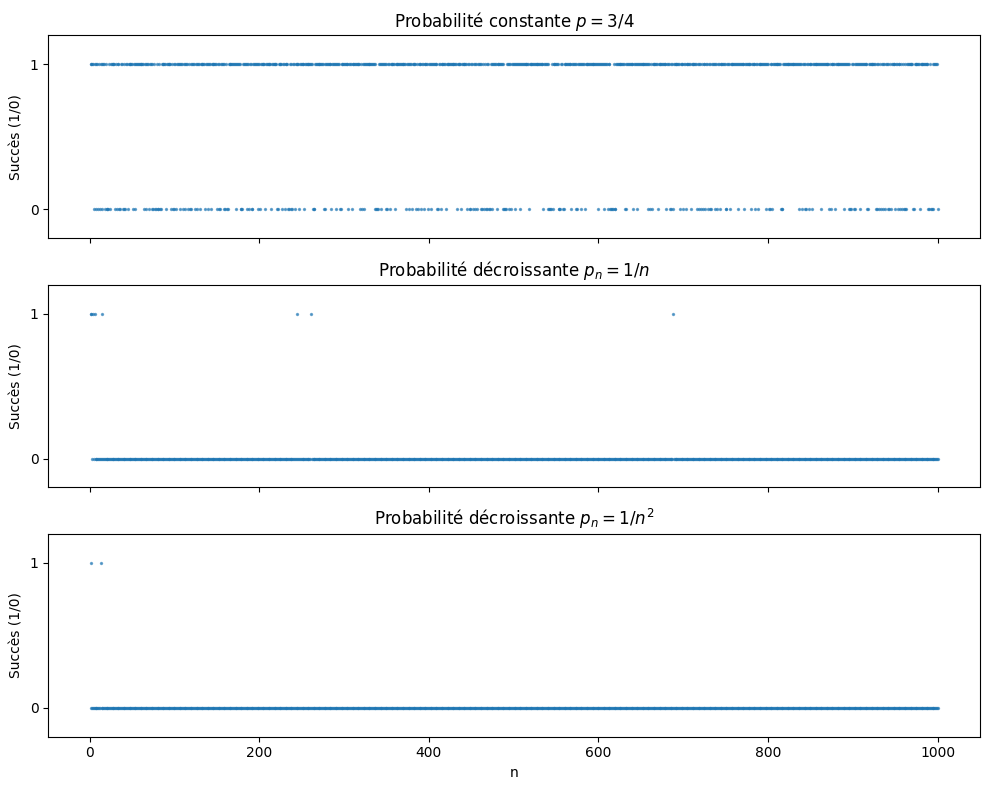

In [76]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

# --- Configuration ---
n = 1000
indices = np.arange(1, n + 1)

# Préparation des données itérables
list_p = [3/4 * np.ones(n), 
          1/indices,
          1/indices**2]

list_titles = [
    r"Probabilité constante $p=3/4$",
    r"Probabilité décroissante $p_n=1/n$",
    r"Probabilité décroissante $p_n=1/n^2$"
]

# Création de la figure
fig, axes = plt.subplots(len(list_p), 1, figsize=(10, 8), sharex=True)

# Boucle avec zip() pour associer axe, probabilité et titre
for ax, p, title in zip(axes, list_p, list_titles):
    # Simulation
    X = (npr.uniform(size=n) <= p) + 0
    
    # Affichage : on utilise des points petits (s=2) pour voir la densité
    ax.scatter(indices, X, 
               s=2, alpha=0.6)
    
    # Configuration via l'objet ax
    ax.set_title(title)
    ax.set_yticks([0, 1])
    ax.set_ylim(-0.2, 1.2) # Un peu d'espace pour la lisibilité
    ax.set_ylabel("Succès (1/0)")

axes[-1].set_xlabel("n")
plt.tight_layout()
plt.show()

---

# Exo 3

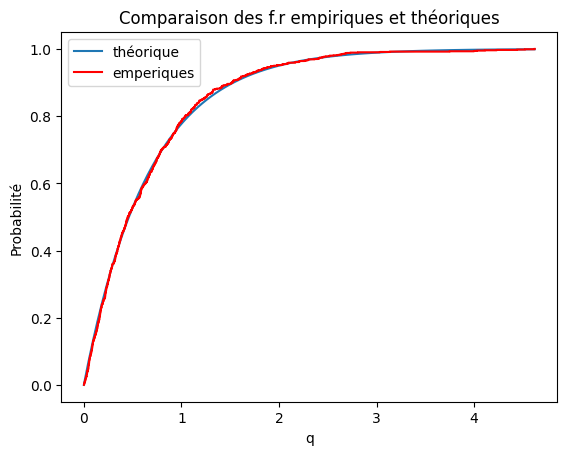

In [106]:

n = 1000
U = npr.uniform(size=n)

#q1

# I don't like l as it looks like 1
# https://news.ycombinator.com/item?id=41838513
l = 1.5
X = -np.log(1 - U)/l
Xs = sorted(X)

fig, ax = plt.subplots()

q = np.linspace(0, max(Xs), num=100)
#plt.figure() # doesn't do anything
ax.set_title("Comparaison des f.r empiriques et théoriques")
ax.set_ylabel("Probabilité")
ax.set_xlabel("q")

ax.plot(q, stats.expon(scale=1/l).cdf(q), 
       label="théorique")
ax.step(Xs,np.linspace(0,1,num=n),color='r',
        where='post', label = "emperiques")
ax.legend()
plt.show()

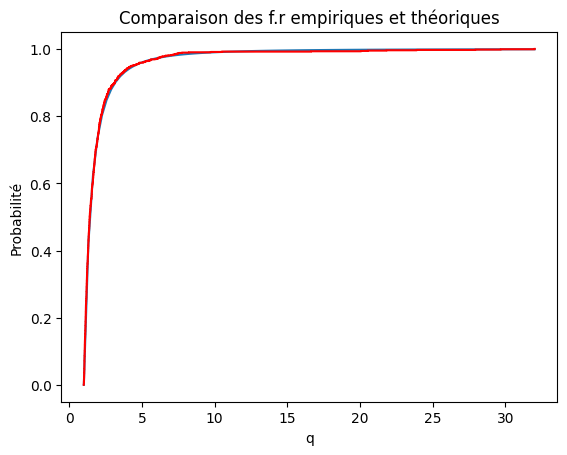

In [110]:
#q2
a = 2
X = (1-U)**(-1/a)
Xs = sorted(X)
q = np.linspace(1, max(Xs), num=100)

plt.title("Comparaison des f.r empiriques et théoriques")
plt.plot(q, 1 - 1/q**a)

#I don't understand why you did this  
#with **arange** when u use **linspace** above in q1
#plt.step(Xs,np.arange(1,n+1)/n,color='r',where='post')
plt.step(Xs,np.linspace(0,1,n),
         color='r',where='post')
plt.ylabel("Probabilité")
plt.xlabel("q")
plt.show()

---

# Exo 4

In [79]:

#q1
def geom(N,p):
    Y = np.zeros(N)
    for j in range(0,N):
        X = npr.choice([0,1],p=[1-p,p])
        t = 1
        while X != 1:
            X = npr.choice([0,1],p=[1-p,p])
            t += 1
        Y[j] = t
    return(Y)

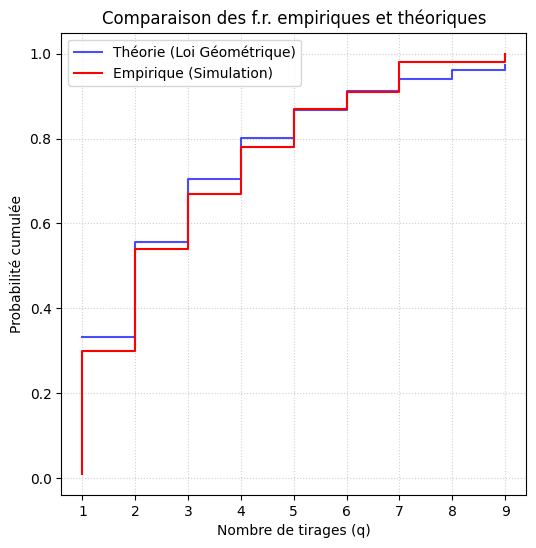

In [81]:
#q2
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

# --- Paramètres ---
N = 100
p = 1/3
Y = geom(N, p)  # Utilise la fonction définie précédemment
Ys = np.sort(Y)

# Création de l'axe des abscisses pour la théorie
q = np.arange(1, int(np.max(Ys)) + 1)
y_theorique = 1 - (1 - p)**q

# --- Création de la figure ---
fig, ax = plt.subplots(figsize=(6, 6))

# Tracé théorique
ax.step(q, y_theorique, where='post', 
        label="Théorie (Loi Géométrique)", color='blue', alpha=0.7)

# Tracé empirique (Données simulées)
ax.step(Ys, np.arange(1, N + 1) / N, where='post', 
        label="Empirique (Simulation)", color='r')


ax.set_title("Comparaison des f.r. empiriques et théoriques")
ax.set_ylabel("Probabilité cumulée")
ax.set_xlabel("Nombre de tirages (q)")
ax.legend()
ax.grid(True, linestyle=':', alpha=0.6)

plt.show()

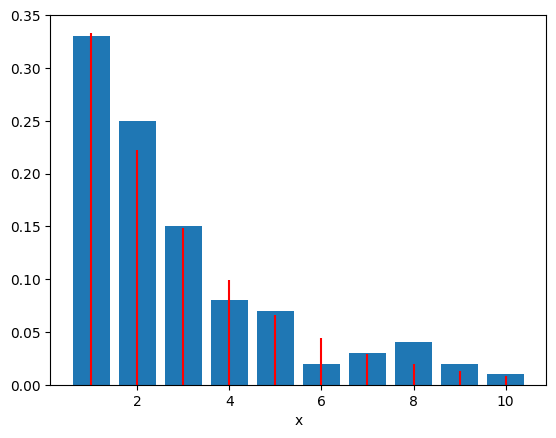

In [21]:
#q3
table = np.unique(Y, return_counts=True)
freq = table[1]/N

x = np.arange(1,max(Y)+1)
#plt.figure()
plt.bar(table[0],freq,label="Fréquence empirique") # Diagramme en batons
plt.vlines(x, 0, stats.geom(p).pmf(x), label='Probabilité',color='r')
plt.xlabel("x")
plt.show()

---

# Exo 5

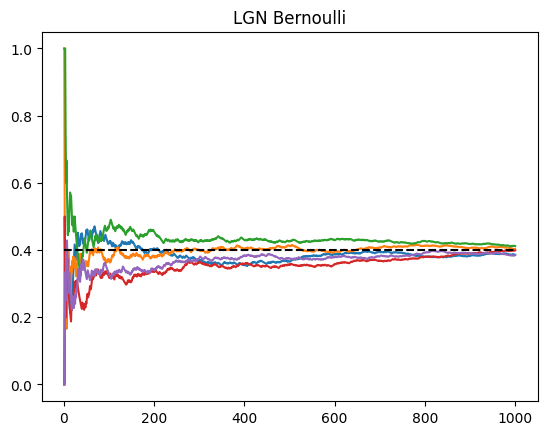

In [66]:

#q1
N = 1000
p = 2/5
#plt.figure()
# i was never used again so I changed to _
for _ in range(0,5):
    X = npr.binomial(1,p,size=N)
    Sbar = np.cumsum(X)/np.arange(1,N+1)
    plt.plot(np.arange(1,N+1),Sbar)

# shouldn't be in the loop
plt.hlines(p,1,N,
            color='k',linestyles='dashed')
plt.title('LGN Bernoulli')
plt.show()

In [43]:
(cols[2]]*3

np.float64(1.35)

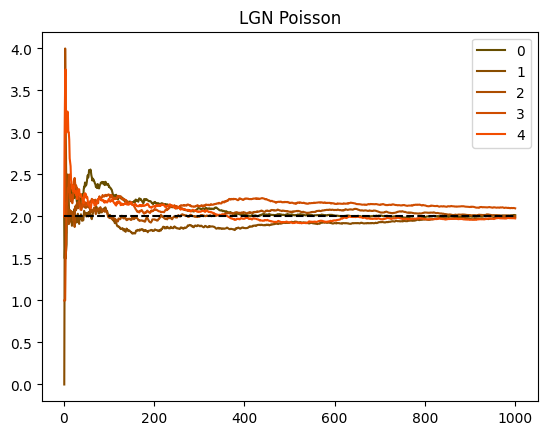

In [67]:
#q2
N = 1000
l = 2
#set up a range to use as r,g,b values
cols = np.linspace(.4,.95,5)
for j in range(0,5):
    X = npr.poisson(l,size=N)
    Sbar = np.cumsum(X)/np.arange(1,N+1)
    plt.plot(np.arange(1,N+1),Sbar,
             color=[cols[j],.3,0], # rgb varying shades of red
             label=f'{j}')
    
# shouldn't be in the loop!    
plt.hlines(l,1,N,color='k',linestyles='dashed')
plt.title('LGN Poisson')
plt.legend()
plt.show()

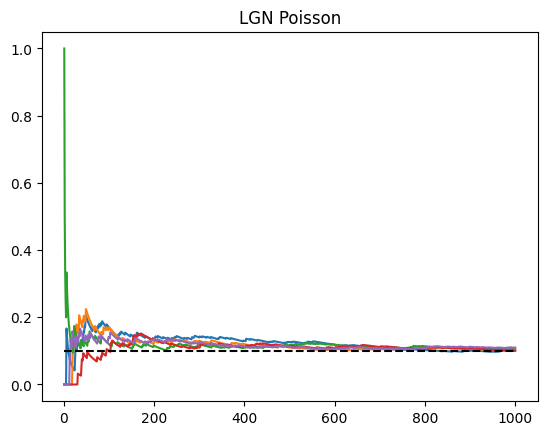

In [68]:
l = 0.1
#plt.figure()
for _ in range(0,5):
    X = npr.poisson(l,size=N)
    Sbar = np.cumsum(X)/np.arange(1,N+1)
    plt.plot(np.arange(1,N+1),Sbar)
    
plt.hlines(l,1,N,color='k',
            linestyles='dashed')
plt.title('LGN Poisson')
plt.show()

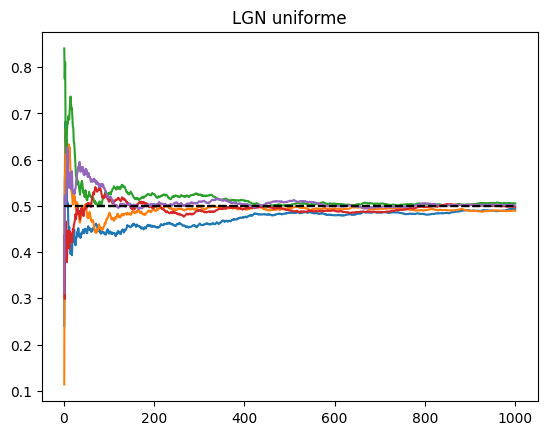

In [69]:
#q3
N = 1000
#plt.figure()
# i was never used so I changed to _
for _ in range(0,5):
    X = npr.uniform(size=N)
    Sbar = np.cumsum(X)/np.arange(1,N+1)
    plt.plot(np.arange(1,N+1),Sbar)
    plt.hlines(1/2,1,N,
               color='k',linestyles='dashed')
    plt.title('LGN uniforme')
plt.show()

---

l'objectif est de mettre en évidence pourquoi la **Loi de Cauchy** 
est un "contre-exemple" classique de la **Loi Forte des Grands Nombres** (LGN).

Puisque la loi de Cauchy n'a pas d'espérance définie,
la moyenne empirique ne converge pas vers une valeur fixe mais continue de subir des sauts brutaux.

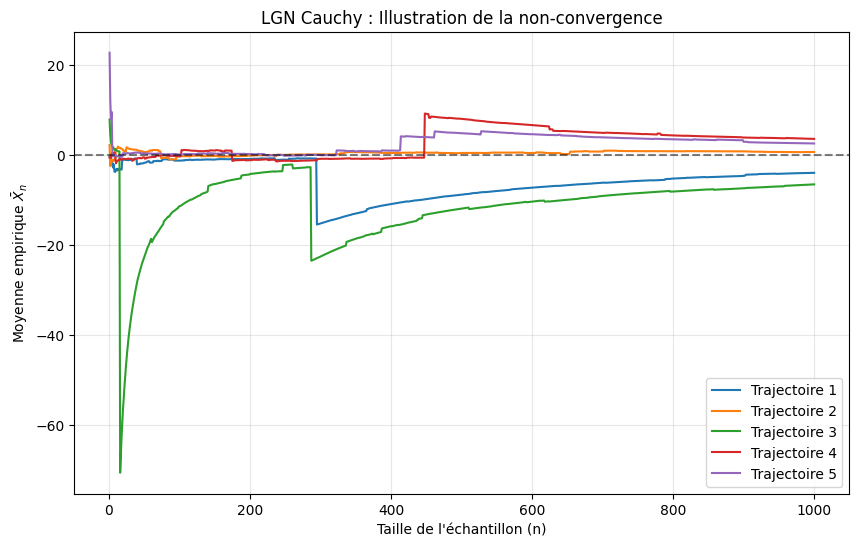

In [73]:
#q4
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# --- Paramètres ---
N = 1000
nb_trajectoires = 5
n_axis = np.arange(1, N + 1)

# Utilisation de subplots pour sécuriser l'espace de nommage
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(nb_trajectoires):
    # Génération des variables de Cauchy (pas d'espérance ni de variance finie)
    X = stats.cauchy.rvs(size=N)
    
    # Calcul de la moyenne glissante (S_n / n)
    Sbar = np.cumsum(X) / n_axis
    
    # Tracé sur l'objet 'ax'
    ax.plot(n_axis, Sbar, label=f'Trajectoire {i+1}')

# --- Configuration via l'objet 'ax' ---
ax.axhline(0, color='black', linestyle='--', alpha=0.5)
ax.set_title('LGN Cauchy : Illustration de la non-convergence')
ax.set_xlabel('Taille de l\'échantillon (n)')
ax.set_ylabel(r'Moyenne empirique $\bar{X}_n$')
ax.legend()
ax.grid(True, alpha=0.3)

plt.show()


---

# Exo 6

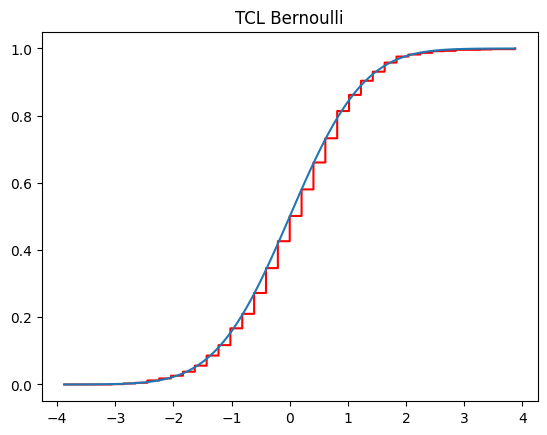

In [99]:
#q1

Nsim = 1000
n = 100
p = 2/5
Y = np.zeros(Nsim)
# i is used again so I  keep it
for i in range(0,Nsim):
    X = npr.binomial(1,p,size=n)
    Y[i] = (np.mean(X) - p) * np.sqrt(n) / np.sqrt(p*(1-p))
    
Ys = sorted(Y)
# to be consistent with Ys
Xs = np.linspace(min(Ys),max(Ys),num=100)
# the Ys are **sorted** so this works 
# Xs = np.linspace(Ys[0],Ys[-1],num=100)

#I changed this as N was inherited from the previous exo 
#and 
plt.step(Ys,np.linspace(0,1,Nsim),
         color='r',where='post')
plt.plot(Xs,stats.norm.cdf(Xs))
plt.title('TCL Bernoulli')
plt.show()


In [96]:
Ys[0], Ys[-1]

(np.float64(-3.061862178478973), np.float64(3.4701104689428344))

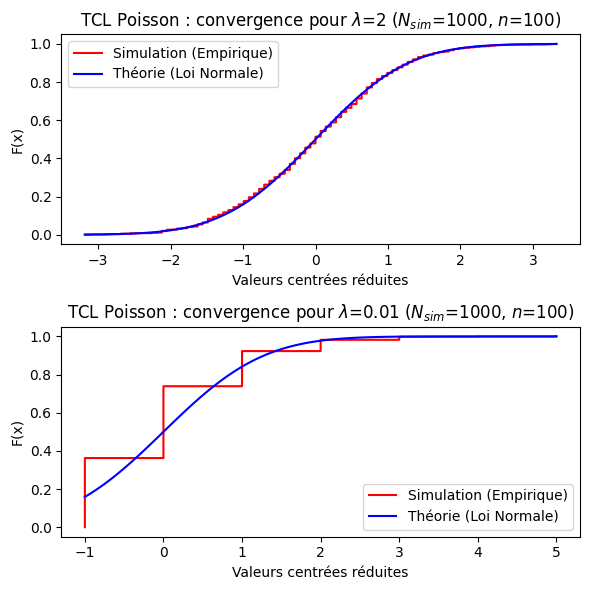

In [101]:
#q2

# parameters inherited from q1
#Nsim = 1000
#n = 100

lambdas = [2,.01]
fig, axes = plt.subplots(len(lambdas),1, figsize=(6, 6))

# I don't use l as a variable name because 
# my eyesight is bad and I see 1 half the time
for ax, Lambda in zip(axes,lambdas):
    Y = np.zeros(Nsim)
    
    for i in range(0,Nsim):
        X = npr.poisson(Lambda,size=n)
        # Calcul de la statistique centrée réduite (TCL)
        # Moyenne empirique : np.mean(X)
        # Espérance : Lambda, Variance : Lambda
        Y[i] = (np.mean(X) - Lambda) * np.sqrt(n) / np.sqrt(Lambda)
        
    Ys = np.sort(Y)

    # Tracé de la fonction de répartition empirique (en escalier)
    ax.step(Ys, np.linspace(0,1,Nsim), 
            color='r', where='post', label="Simulation (Empirique)")
    
    # Tracé de la loi normale théorique N(0,1)
    Xs = np.linspace(Ys.min(), Ys.max(), len(X))
    ax.plot(Xs, stats.norm.cdf(Xs), 
                color='b', lw=1.5, 
                label="Théorie (Loi Normale)")
    
    ax.set_title(f'TCL Poisson : convergence pour $\lambda$={Lambda} ($N_{{sim}}$={Nsim}, $n$={n})')
    ax.set_xlabel("Valeurs centrées réduites")
    ax.set_ylabel("F(x)")
    ax.legend()

plt.tight_layout()
plt.show()


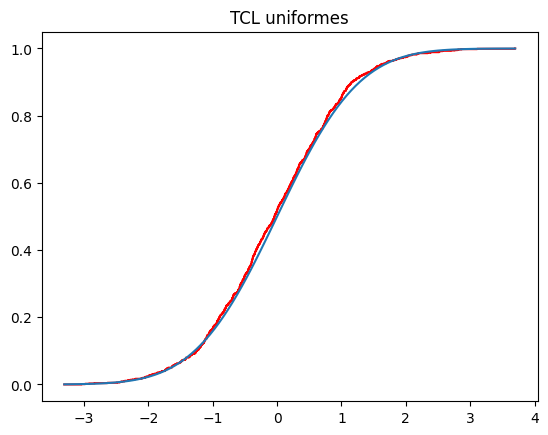

In [103]:
#q3

Y = np.zeros(Nsim)
for i in range(0,Nsim):
    X = npr.uniform(size=n)
    Y[i] = (sum(X)/n-1/2)*np.sqrt(n)/np.sqrt(1/12)
Ys = sorted(Y)
x = np.linspace(min(Y),max(Y),num=100)
# I don't know where N was set so I changed this to Nsim
# is that correct?
#plt.step(Ys,np.arange(1,N+1)/N,color='r',where='post')
plt.step(Ys,np.linspace(0,1,Nsim),
         color='r',where='post')
plt.plot(x,stats.norm.cdf(x))
plt.title('TCL uniformes')
plt.show()

In [84]:
! ../.g


[master 68da19a] web
 13 files changed, 3498 insertions(+), 34 deletions(-)
 create mode 100644 MATH/.ipynb_checkpoints/Untitled1-checkpoint.ipynb
 create mode 100644 MATH/.ipynb_checkpoints/ellipses-checkpoint.ipynb
 create mode 100644 MATH/Untitled1.ipynb
 create mode 100644 MATH/circumcenter.md
 create mode 100644 MATH/ellipse.py
 create mode 100644 MATH/ellipses.ipynb
 create mode 100644 PROBA/.ipynb_checkpoints/TP1-checkpoint.ipynb
 create mode 100644 PROBA/.ipynb_checkpoints/tp1_L3M-checkpoint.py
 create mode 100644 PROBA/TP1.ipynb
 create mode 100644 PROBA/tp1_L3M.py
Enumerating objects: 20, done.
Counting objects: 100% (20/20), done.
Delta compression using up to 2 threads
Compressing objects: 100% (15/15), done.
Writing objects: 100% (15/15), 624.72 KiB | 6.44 MiB/s, done.
Total 15 (delta 6), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (6/6), completed with 5 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   d0732e6..68da19a  master -> 